In [1]:
# import basic librariees and autograd wrapped numpy
import sys
sys.path.append('../')
import autograd.numpy as np
import matplotlib.pyplot as plt

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# 4.1

(a)

$\pmb{C}$ is a symmetric matrix, and it can be written as $\pmb{C} = \pmb{V}\pmb{D}\pmb{V}^T$ where V is the stacking of eigenvectors and D is the diagonal matrix for all eigenvalues.

so the original expression can be written as
$$Orig=\pmb{z}^T\pmb{C}\pmb{z} = \pmb{z}^T\pmb{V}\pmb{D}\pmb{V}^T\pmb{z}=\pmb{z}^T\pmb{V}\pmb{D}(\pmb{z}^T\pmb{V})^T$$

let' says $\pmb{y}^T=\pmb{z}^T\pmb{V}=(y_1, y_2..., y_N)$, then $Orig=d_1y_1^2+d_2y_2^2+...d_Ny_N^2 \geq 0$ because $d_i \geq 0$

(b) 

if there is a $d_i < 0$, then we can find a $y_i$ s.t. 

$$d_1y_1^2 + ... +d_{i-1}y_{i-1}^2 + d_{i+1}y_{i+1}^2+... +d_N{y_N}^2 < -d_iy_i^2$$

which is a contradict to the condition $Orig \geq 0$, so $d_i$ must be greater or equals to 0

(c)

$\nabla^2g(\pmb{w})=2\pmb{C}$.

Assume that $\pmb{z}=(z_1, z_2)$, then $$\pmb{z}^T\pmb{C}\pmb{z}=z_1^2+2z_1z_2 + z_2^2 = (z_1+z_2)^2 \geq 0$$ 

Since we prove it in (b), we can state that all eigenvalues of $C$ are nonnegative.

(d)
notice that

$$\pmb{z}^T(\pmb{C}+\lambda\pmb{I})\pmb{z}=(d_1+\lambda)y_1^2+(d_2+\lambda)y_2^2+...+(d_N+\lambda)y_N^2 \geq 0 \text{ iff } d_i + \lambda \geq 0$$

When $\lambda$ is greater than $\min\{d_1, d_2, ..., d_N\}$, $\pmb{z}^T(\pmb{C}+\lambda\pmb{I})\pmb{z} \geq 0$, so the smallest number of $\lambda$ is $\min\{d_1, d_2, ..., d_N\}$

# 4.5

(a)

$$\nabla g(\pmb{w})=\frac{e^{\pmb{w}^T\pmb{w}}}{1+e^{\pmb{w}^T\pmb{w}}}2\pmb{w}=\pmb{0} \iff \pmb{w}=(0,0)$$

so the stationary point is $\pmb{w}=(0,0)$

(b)

$$\frac{\partial g(\pmb{w})}{\partial w_i}=\frac{e^{\pmb{w}^T\pmb{w}}}{1+e^{\pmb{w}^T\pmb{w}}}2w_i$$

let $h(\pmb{w}) = \frac{e^{\pmb{w}^T\pmb{w}}}{1+e^{\pmb{w}^T\pmb{w}}}$, we get

$$\frac{\partial h(\pmb{w})}{\partial w_j} = \frac{e^{\pmb{w}^T\pmb{w}}}{(1+e^{\pmb{w}^T\pmb{w}})^2}2w_j$$

then, we can easily get

$$\frac{\partial^2 g(\pmb{w})}{\partial w_i^2}=\frac{e^{\pmb{w}^T\pmb{w}}}{(1+e^{\pmb{w}^T\pmb{w}})^2}(4w_i^2+2+2e^{\pmb{w}^T\pmb{w}})$$

$$\frac{\partial^2 g(\pmb{w})}{\partial w_i \partial w_j}=\frac{e^{\pmb{w}^T\pmb{w}}}{1+e^{\pmb{w}^T\pmb{w}}}4w_iw_j$$

then, we can write hessian matrix as

$$
\nabla^2g(\pmb{w})=\frac{4e^{\pmb{w}^T\pmb{w}}}{1+e^{\pmb{w}^T\pmb{w}}}
\left[
\begin{matrix} 
w_1^2+0.5+0.5e^{\pmb{w}^T\pmb{w}}&w_1w_2&...&w_1w_N \\
w_2w_1&w_2^2+0.5+0.5e^{\pmb{w}^T\pmb{w}}&...&w_2w_N \\
...                                                \\
w_Nw_1&w_Nw_2&...&w_N^2+0.5+0.5e^{\pmb{w}^T\pmb{w}}\\
\end{matrix}
\right]
$$

where $\delta_p=1 \geq 0$ and $\lambda = 0.5 + 0.5e^{\pmb{w}^T\pmb{w}} > 0$. So $g(\pmb{w})$ is convex and the stationary point at $\pmb{0}$ is the global minimum.

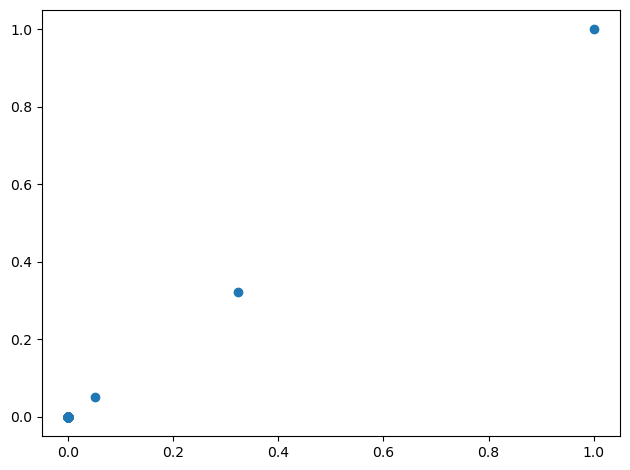

In [2]:
#(c)
from autograd import grad
from autograd import hessian
def newtons_method(g, max_its, w):
    gradient = grad(g)
    hess = hessian(g)
    epsilon = 1e-7
    
    weight_his = [w]
    cost_his = [g(w)]
    for k in range(max_its):
        
        grad_eval = gradient(w)
        hess_eval = hess(w)
        
        hess_eval.shape = (int(np.size(hess_eval)**0.5),
                           int(np.size(hess_eval)**0.5))
        A = hess_eval + epsilon*np.eye(w.size)
        b = grad_eval
        w = np.linalg.solve(A, np.dot(A,w)-b)
        weight_his.append(w)
        cost_his.append(g(w))
    return weight_his, cost_his

def g(w : np.array) -> float:
    return np.log(1+np.exp(np.dot(w.T, w)))

weight_his, cost_hist = newtons_method(g, 100, np.ones((2, 1)))
weight_his = np.array(weight_his).transpose((1,0,2))
x, y = weight_his
plt.scatter(x, y)

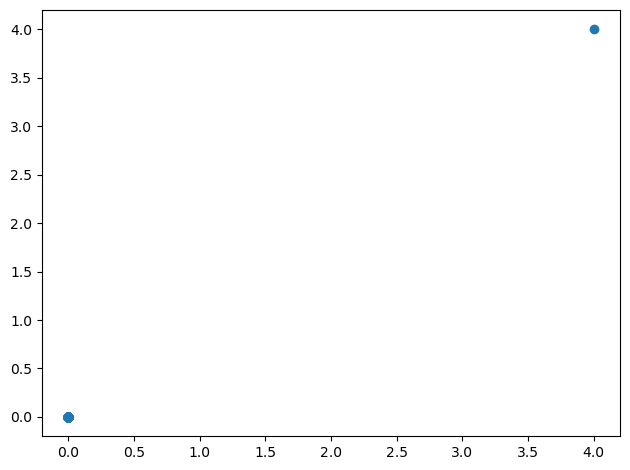

In [3]:
#(d)
from autograd import grad
from autograd import hessian
def newtons_method(g, max_its, w):
    gradient = grad(g)
    hess = hessian(g)
    epsilon = 1e-7
    
    weight_his = [w]
    cost_his = [g(w)]
    for k in range(max_its):
        
        grad_eval = gradient(w)
        hess_eval = hess(w)
        
        hess_eval.shape = (int(np.size(hess_eval)**0.5),
                           int(np.size(hess_eval)**0.5))
        A = hess_eval + epsilon*np.eye(w.size)
        b = grad_eval
        w = np.linalg.solve(A, np.dot(A,w)-b)
        weight_his.append(w)
        cost_his.append(g(w))
    return weight_his, cost_his

def g(w : np.array) -> float:
    return np.log(1+np.exp(np.dot(w.T, w)))

weight_his, cost_hist = newtons_method(g, 100, 4*np.ones((2, 1)))
weight_his = np.array(weight_his).transpose((1,0,2))
x, y = weight_his
plt.scatter(x, y)

(-1.0, 5.0)

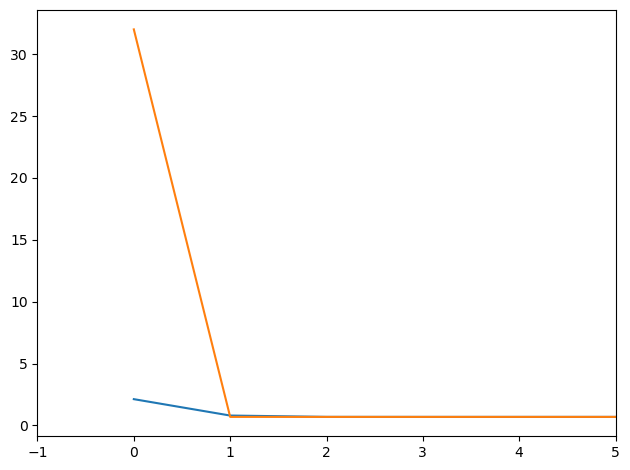

In [4]:
_, cost1 = newtons_method(g, 1000, np.ones((2, 1)))
_, cost2 = newtons_method(g, 1000, 4*np.ones((2, 1)))
cost1 = np.array(cost1).squeeze()
cost2 = np.array(cost2).squeeze()
plt.plot(cost1)
plt.plot(cost2)
plt.xlim([-1, 5])

From the figure above we can notice that it's because the minimum point of second-order Taylor series approximation function is much closer to $\pmb{0}$ when we start at $4\cdot\pmb{1}$

# 5.2

(1, 1498) (1, 1498)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1

(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(

(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(1498, 1) (1, 1) (1498, 1)
(

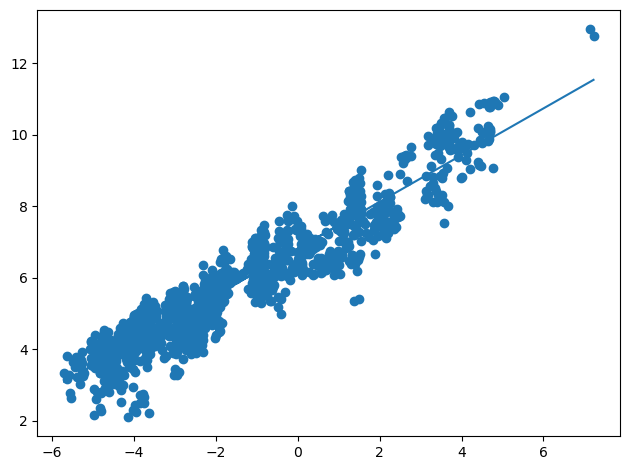

In [15]:
#(a)
datapath = './superlearn_datasets/'
csvname = datapath + 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]
print(x.shape, y.shape)
P = 1000

def model(x, w):
    a = w[0] + np.dot(np.log(x.T), w[1:])
    print(x.T.shape, w[1:].shape, a.shape)
    return a.T
def least_squares(w):
    cost = np.sum((model(x, w) - np.log(y))**2)
    return cost/float(y.size)

w = np.random.rand(2, 1)
weight_his, cost_his = newtons_method(least_squares, P, w)
w = weight_his[-1]
plt.scatter(np.log(x), np.log(y))
plt.plot(np.log(x).squeeze(), model(x, w).squeeze())

In [6]:
#(b)
print(f"{w[0].squeeze()} + log(x) * {w[1].squeeze()} = log(y)")

6.814734774379877 + log(x) * 0.6528120976176701 = log(y)


In [7]:
#(c)

print(f"calories is {np.exp(model(np.log(10), w)).squeeze()/4.18} cal")

calories is 375.73721317214427 cal


# 5.9

In [8]:
#(Examples 5.5)
#(a)
csvname =  datapath + 'boston_housing.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]
def norm(x):
    mu = np.sum(np.array(x), 1) / float(x.shape[1])
    tmp = np.apply_along_axis(lambda x : x - mu, 0, x)
    sigma = np.sqrt(np.sum(np.apply_along_axis(lambda x : x - mu, 0, x)**2, 1) / float(x.shape[1]))
    x = np.apply_along_axis(lambda x : (x - mu) / sigma, 0, x)
    return x

def model(x, w):
    #print(x.shape, w.shape)
    a = w[0] + np.dot(x.T, w[1:])
    return a.T


def absolute_error(w):
    cost = np.sum(np.abs(model(x, w) - y))
    return cost/float(y.size)

def gradient_descent(g, max_its, w):
    gradient = grad(g)
    weight_his = [w]
    cost_his = [g(w)]
    for k in range(max_its):
        grad_eval = gradient(w)
    
        w = w - grad_eval
        weight_his.append(w)
        cost_his.append(g(w))
    return weight_his, cost_his

x = norm(x)
#y = norm(y)
w = np.random.rand(x.shape[0] + 1, 1)
weight_his, cost_his = gradient_descent(absolute_error, P, w)
w = weight_his[-1]
MAD = np.sum(np.abs(model(x, w) - y)) / float(y.shape[1])
print(MAD)

3.091587009171095


In [9]:
#(b)
# import the dataset
csvname =  datapath + 'auto_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = norm(x)
#y = norm(y)
#print(x, y)
w = np.random.rand(x.shape[0] + 1, 1)
weight_his, cost_his = gradient_descent(absolute_error, P, w)
w = weight_his[-1]
MAD = np.sum(np.abs(model(x, w) - y)) / float(y.shape[1])
print(MAD)

3.0908679445874063
